# Google Colab Lab Assignment -YOLO 11 Model

**Course Name:** DEEP LEARNING

**Lab Title:** Yolo11 -Model-Application Name(Custom Dataset should be Different for each group)

# **Student Name:** **Samruddhi Krishna Bhujbal**

**Student ID:**202201070011

**Group Members**: Snehal Sunil Bankar, Shrushti Ghadge


**Objective**
The purpose of this lab is to understand and implement YOLOv11 for real-time object detection. Students will perform dataset preparation, model implementation, inference, and performance evaluation.




**Task 1: Environment Setup and YOLOv11 Installation**

Objective: Set up the required libraries and dependencies to run YOLOv11.

**Instructions:**

1. Install Python and required libraries (PyTorch, OpenCV, Ultralytics, etc.).
2. Install YOLOv11 from the official repository.
3. Verify the installation by running a sample script.
4. **Expected Outcome:** A functional YOLOv11 environment ready for experimentation.


In [1]:
!pip install ultralytics

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/107.7 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import Image

**Task 2: Dataset Preparation & Preprocessing**
Objective: Load and preprocess a dataset for object detection.

Instructions:

1. Choose a Dataset – Use COCO, Pascal VOC, or a custom dataset.
2. Annotate Images – If using a custom dataset, label objects using Roboflow or LabelImg.
3. Convert Annotations – Use Roboflow to export the dataset in YOLO format.
4. Download the Dataset – Use the Roboflow API to fetch the dataset.
5. Split the Dataset – Divide into train (80%), validation (10%), and test (10%).
5. **Expected Outcome:** A well-structured dataset in YOLO format.




In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cpPxLlw9awEJV10dAdZg")
project = rf.workspace("hadv2").project("had-v2")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [11]:
dataset.location

'/content/HAD-v2-3'


**Task 3: Training YOLOv11 Model**
Objective: Train YOLOv11 on the prepared dataset.

Instructions:

1. Configure the training parameters (batch size, epochs, learning rate).
2. Train the YOLOv11 model using the dataset.
3. Monitor training progress (loss, accuracy, mAP).
4. Save the trained model weights.
5. Expected Outcome: A trained YOLOv11 model ready for inference.






In [13]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=200

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/HAD-v2-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, 

**Task 4:**Model Inference and Evaluation
Objective: Test the trained model on new images and videos.

Instructions:

1.  Load the trained model weights.
2.  Run object detection on test images and videos.
3.  Evaluate the model performance using mAP (mean Average Precision), precision, recall.

✅ Mean Average Precision (mAP@50, mAP@50-95) – Measures model accuracy across different IoU thresholds.

✅ Precision & Recall – Evaluates the tradeoff between false positives and false negatives.

✅ F1 Score – Balances precision and recall for a comprehensive model assessment.

**Discuss the results in detail**
4.  Visualize results with bounding boxes.
5.  Expected Outcome: Detection results with bounding boxes and performance metrics.



**Discussion and Conclusion on Result Analysis** *##Add Text##*


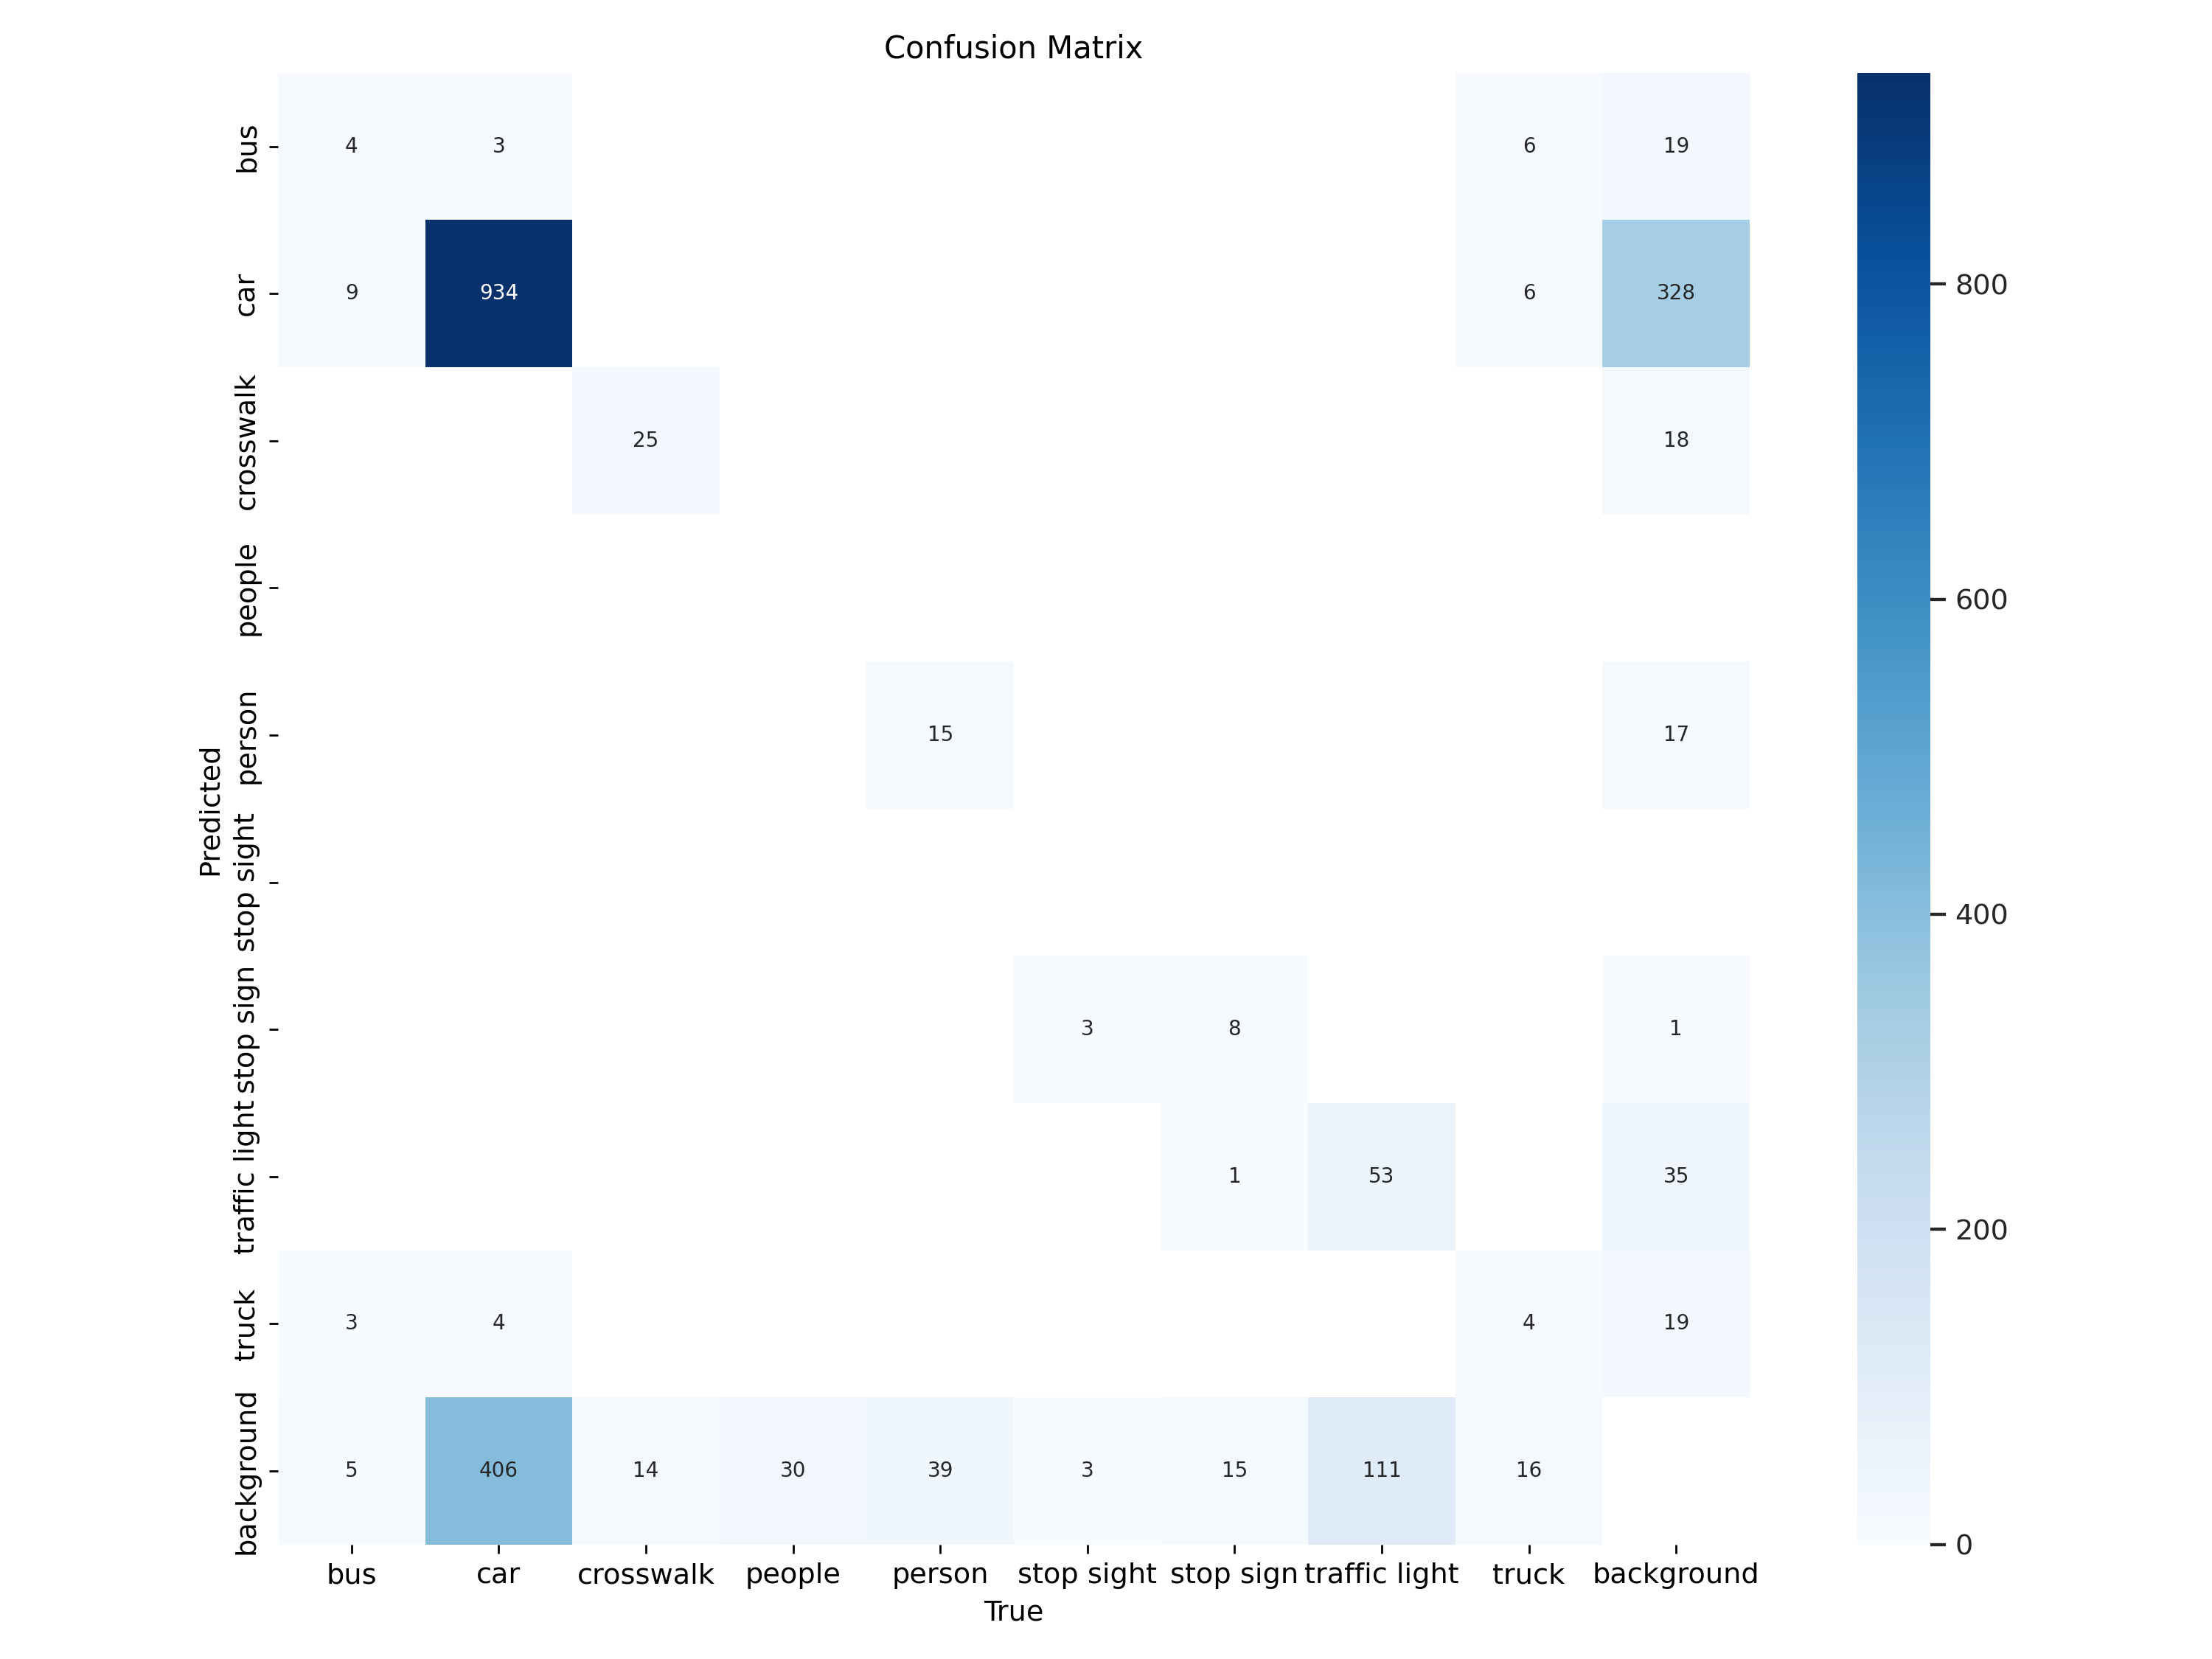

In [14]:
Image("/content/runs/detect/train3/confusion_matrix.png", width=600)

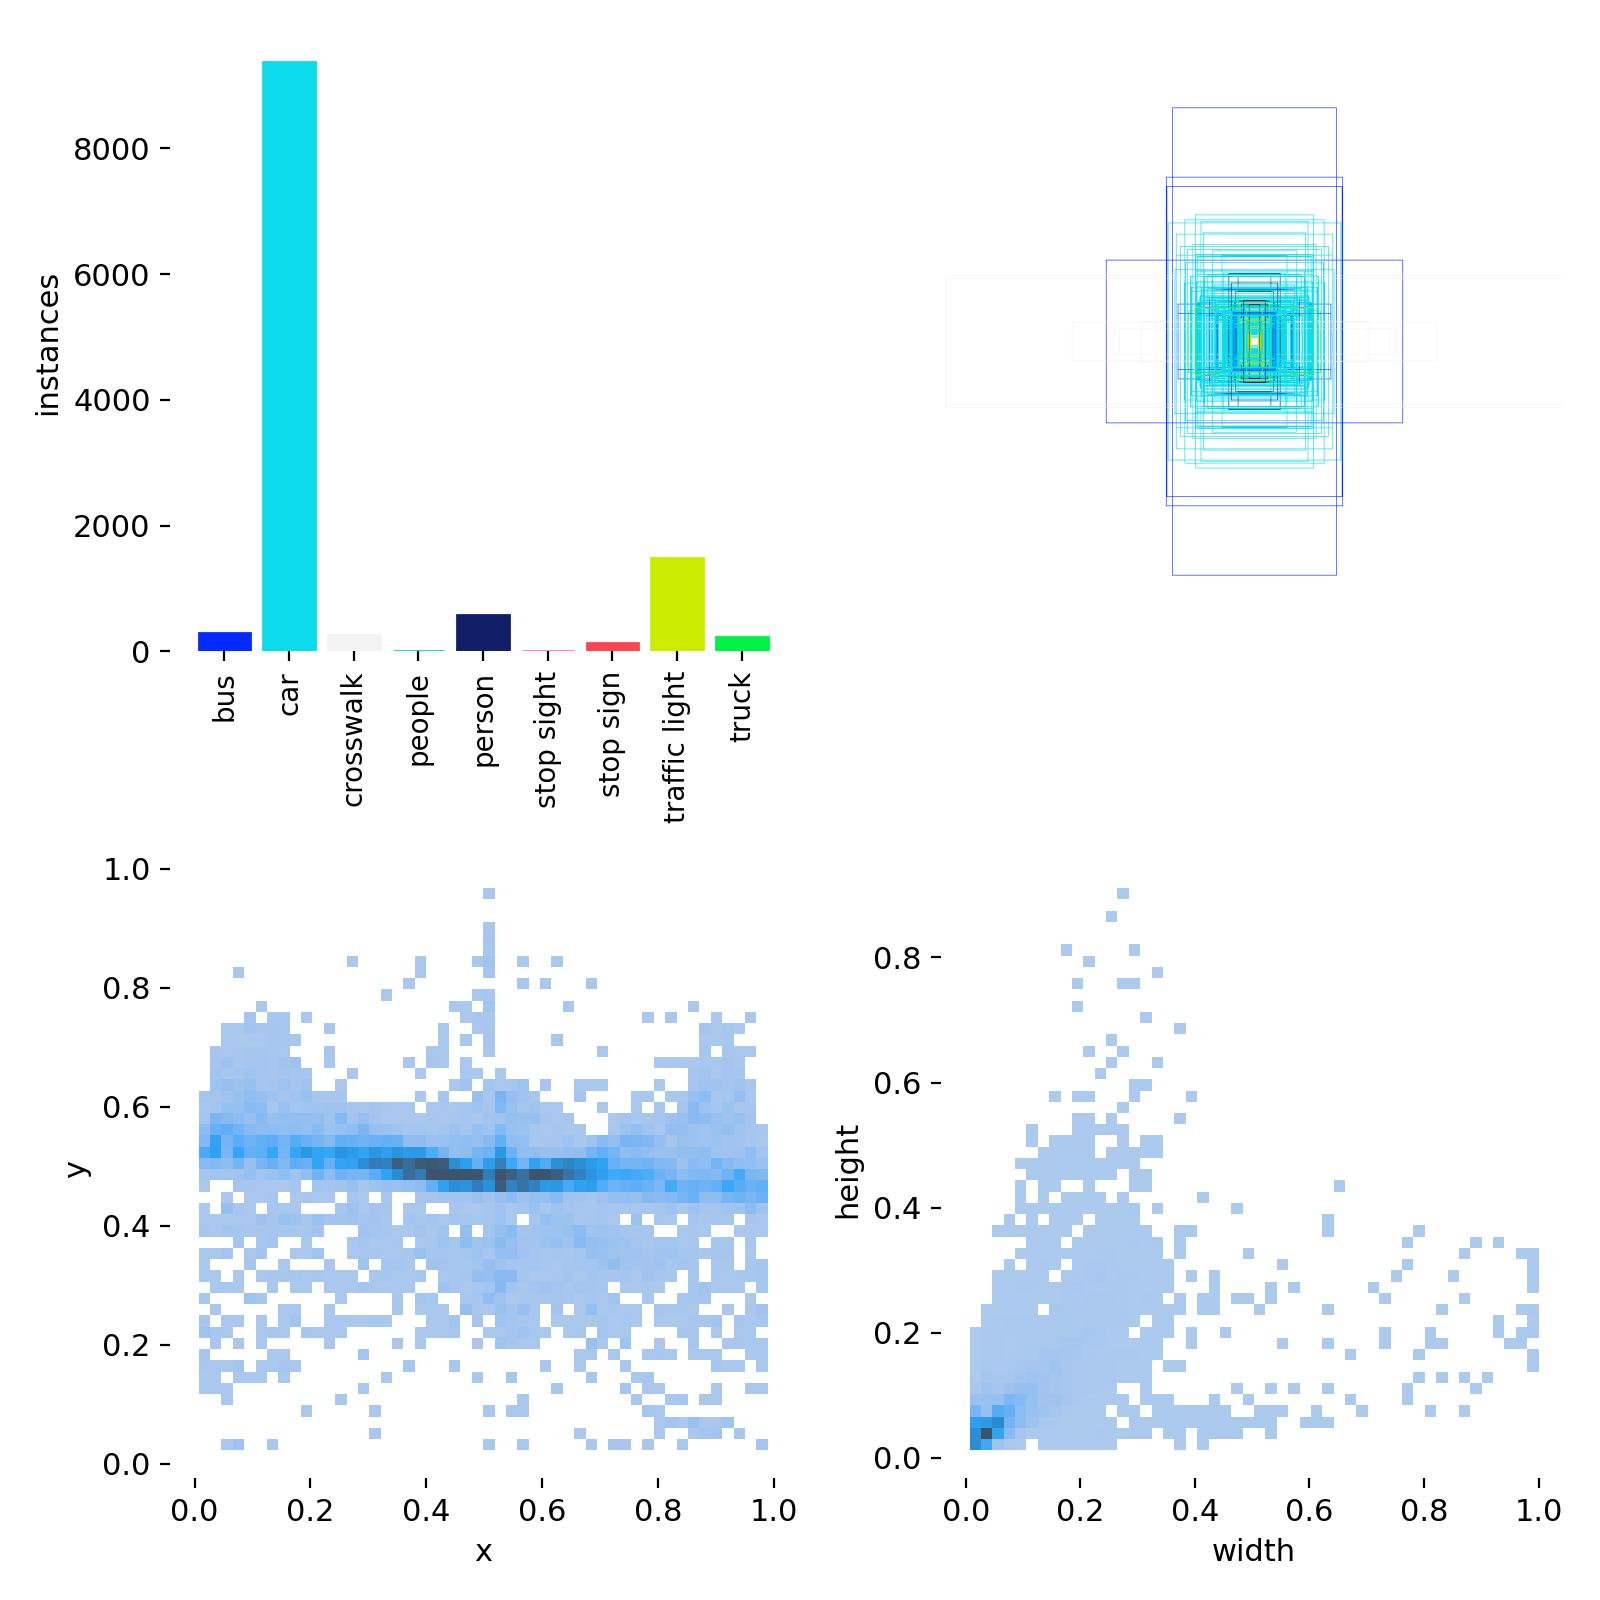

In [15]:
Image("/content/runs/detect/train3/labels.jpg", width=600)

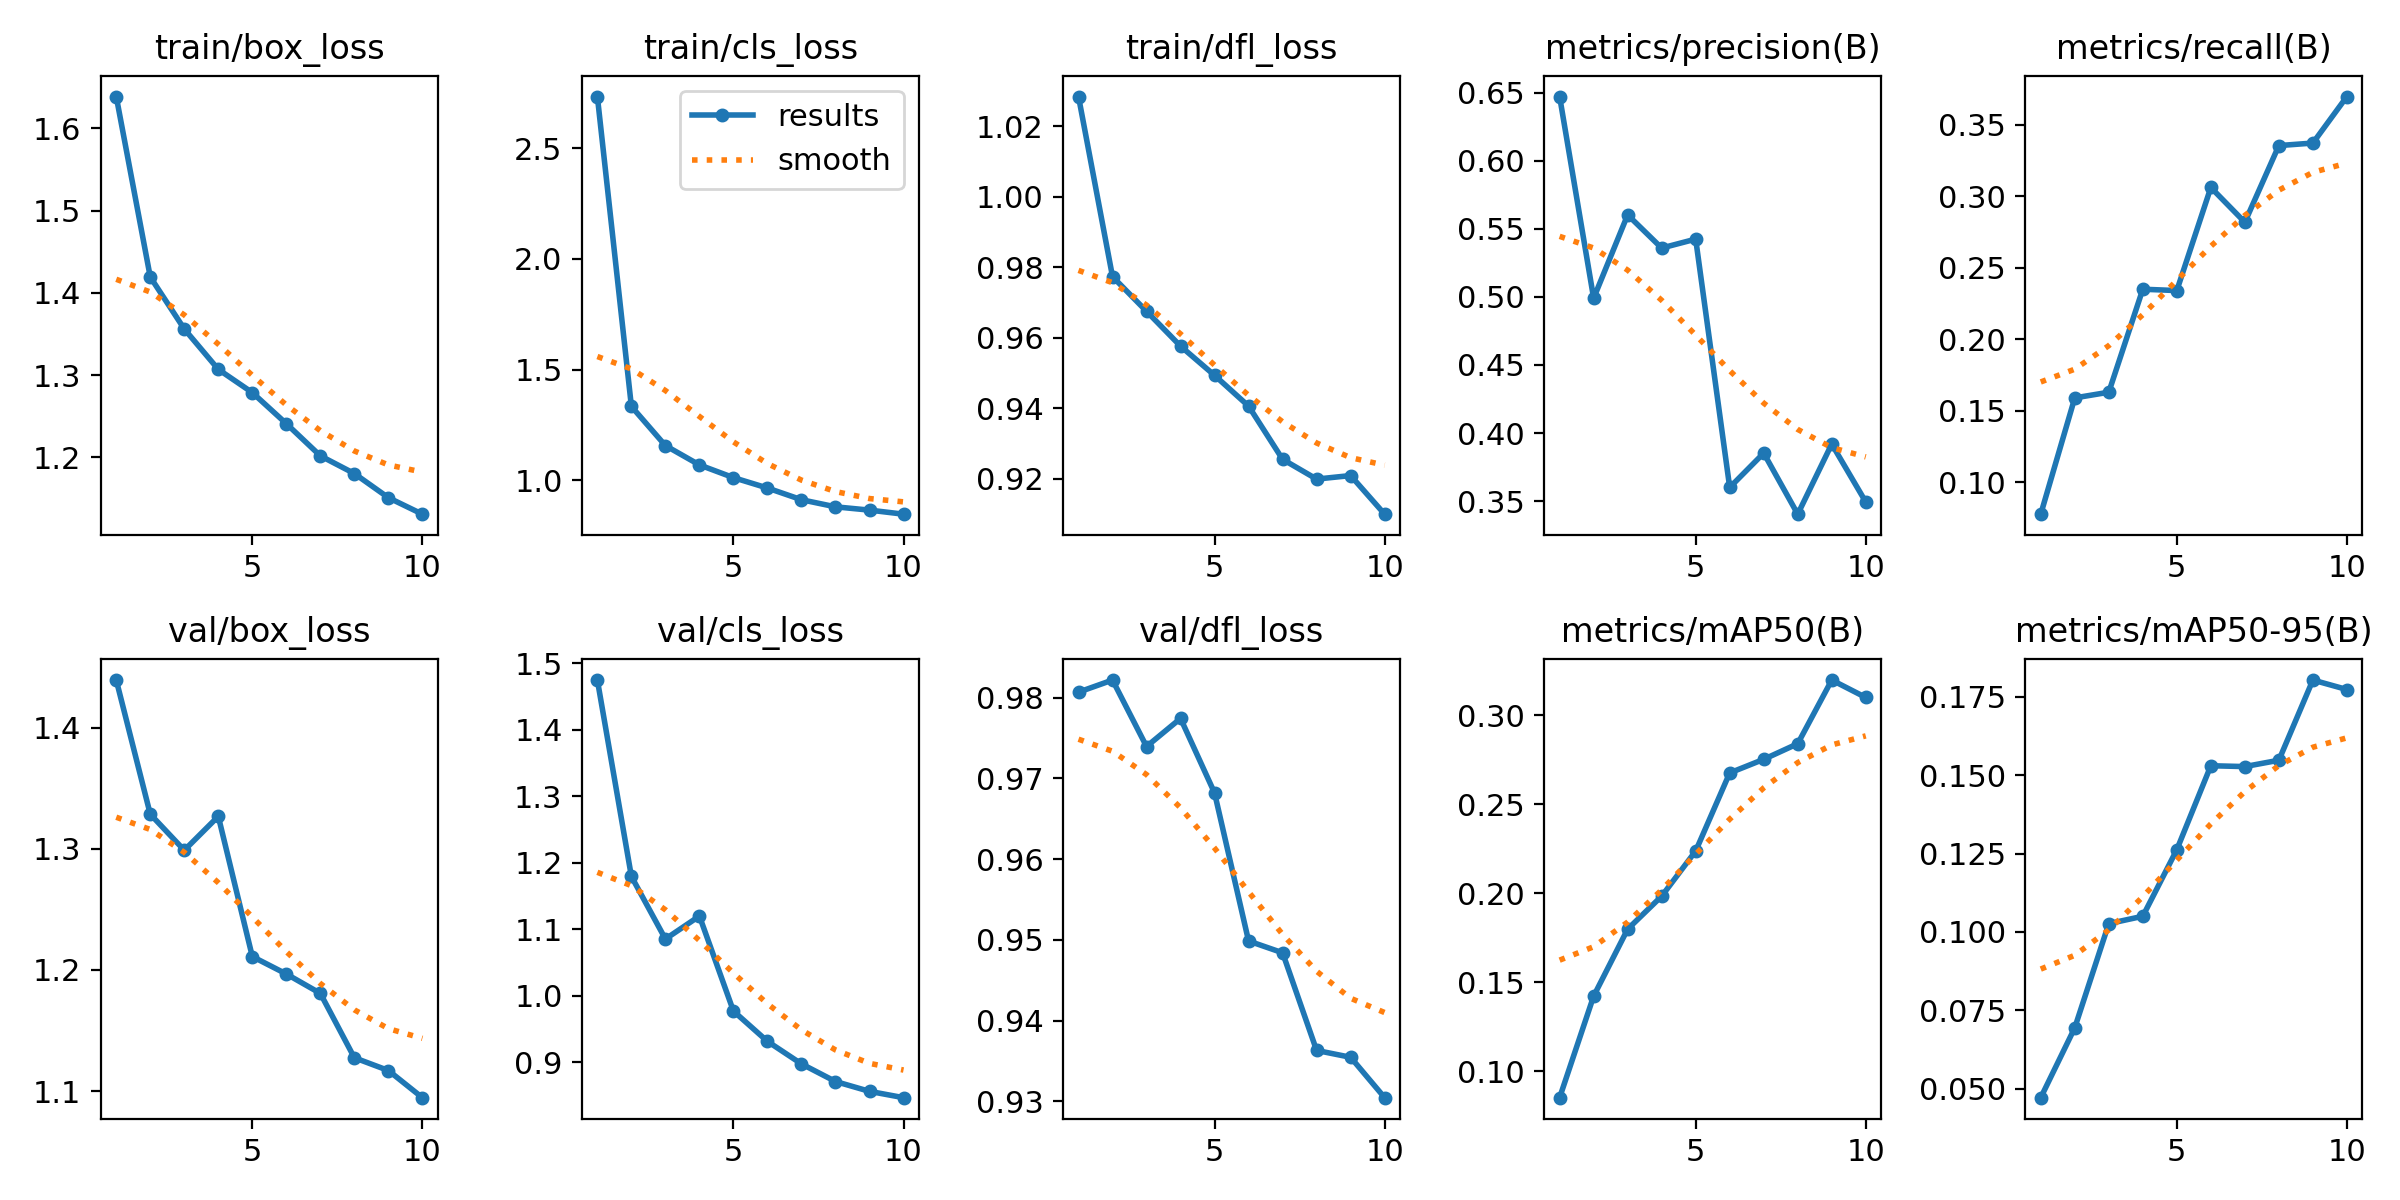

In [16]:
Image("/content/runs/detect/train3/results.png", width=600)

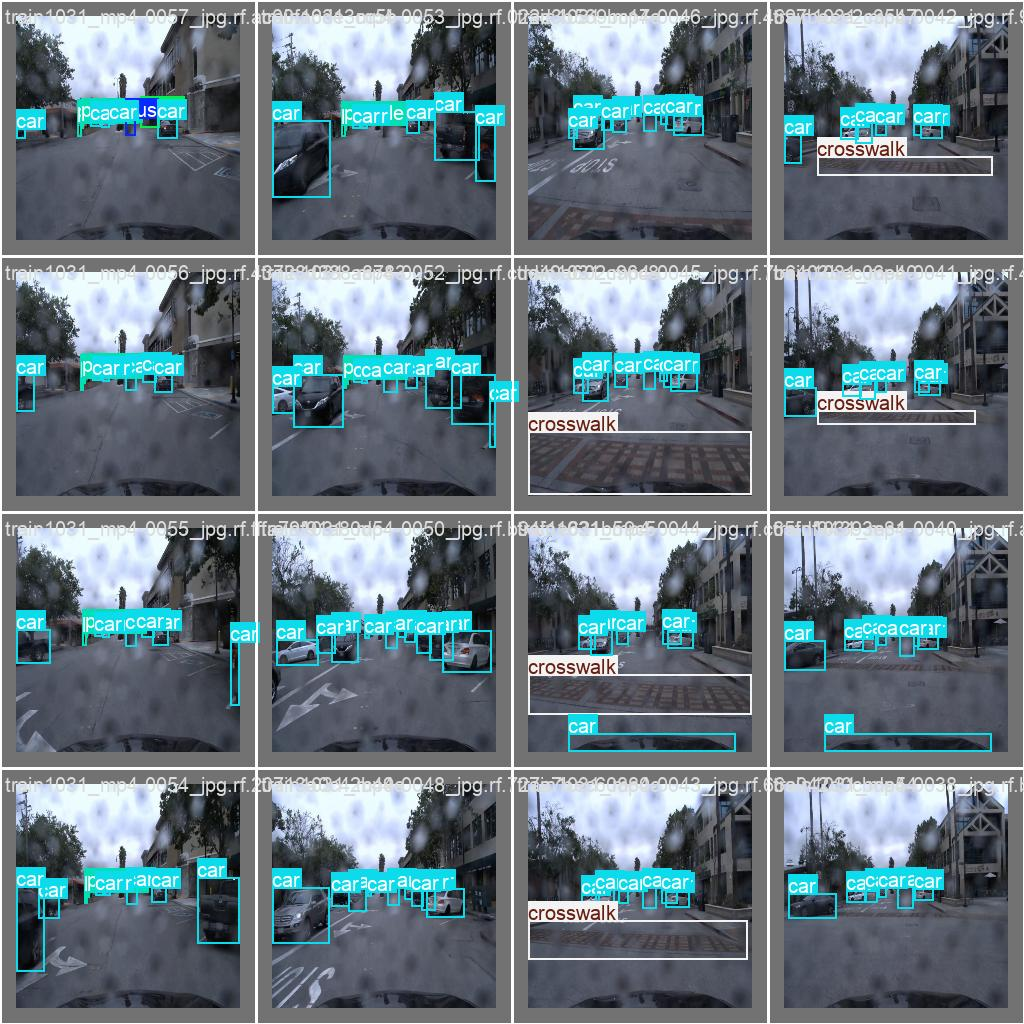

In [17]:
Image("/content/runs/detect/train3/val_batch0_labels.jpg", width=600)

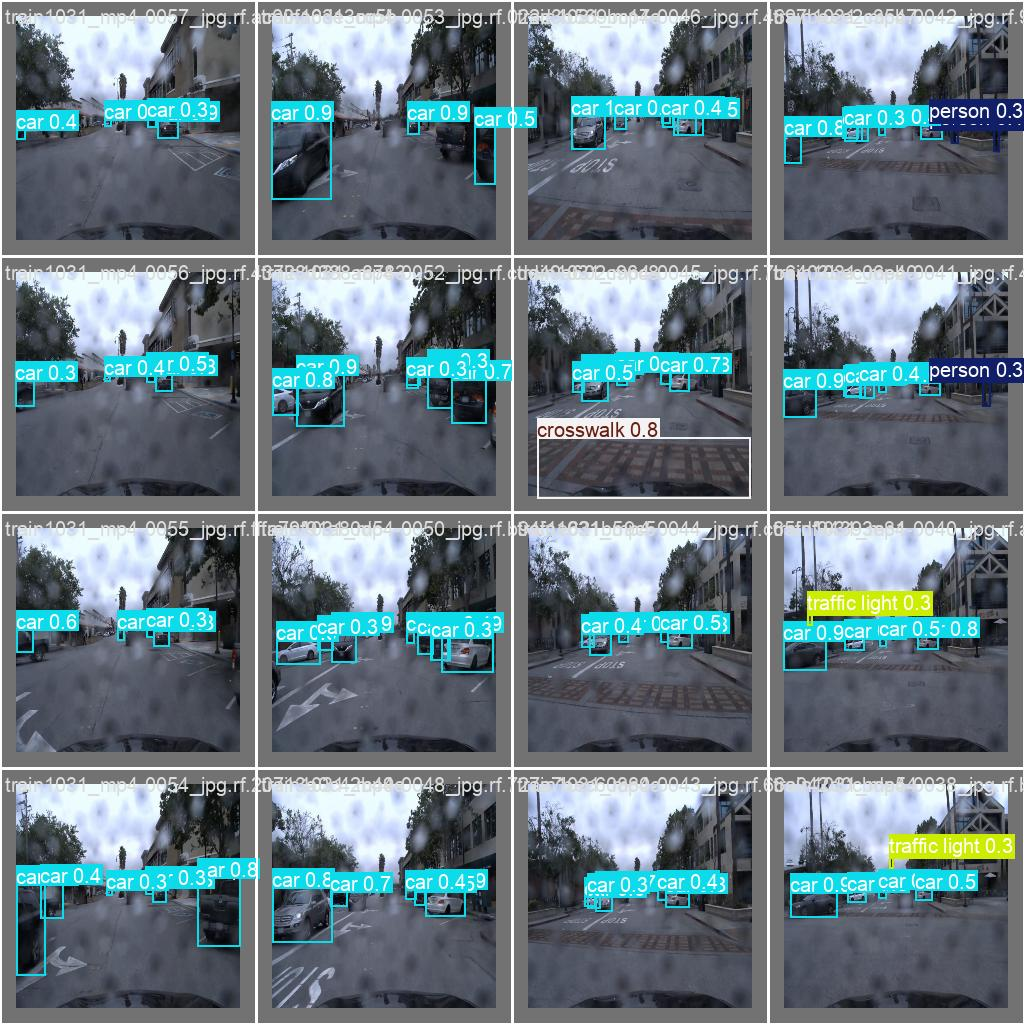

In [18]:
Image("/content/runs/detect/train3/val_batch0_pred.jpg", width=600)

In [19]:
!yolo task=detect mode=val model="/content/runs/detect/train3/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/HAD-v2-3/valid/labels.cache... 259 images, 7 backgrounds, 0 corrupt: 100% 259/259 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:09<00:00,  1.77it/s]
                   all        259       1717      0.392      0.336       0.32      0.181
                   bus         18         21      0.274      0.429      0.182      0.138
                   car        248       1347      0.708       0.69      0.722      0.453
             crosswalk         34         39      0.557      0.641      0.576      0.291
                people         23         30          0          0          0          0
                person         36         54      0.432      0.278      0.252      0.145
            stop sight          6          6          0     

In [20]:
!yolo task=detect mode=predict model="/content/runs/detect/train3/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs

image 1/703 /content/HAD-v2-3/test/images/train0004-mp4_520_jpg.rf.6ffb2198919747a8d88b7c3c3dd7ea36.jpg: 224x224 2 cars, 1 traffic light, 37.2ms
image 2/703 /content/HAD-v2-3/test/images/train0005-mp4_460_jpg.rf.bd6fccbb426506348d25688500040449.jpg: 224x224 3 cars, 28.7ms
image 3/703 /content/HAD-v2-3/test/images/train0006-mp4_360_jpg.rf.8965a8fcecb17ce27b2a1e131bc7706a.jpg: 224x224 6 cars, 30.9ms
image 4/703 /content/HAD-v2-3/test/images/train0007-mp4_490_jpg.rf.920884bc55481040eb287d35f4a1e249.jpg: 224x224 3 cars, 4 traffic lights, 28.9ms
image 5/703 /content/HAD-v2-3/test/images/train0008-mp4_180_jpg.rf.a6f6f5f4b950aa4b7d4ef5ce24889a76.jpg: 224x224 13 cars, 31.3ms
image 6/703 /content/HAD-v2-3/test/images/train0011-mp4_130_jpg.rf.633dcfa3323db5a9cee5e3f6499fe340.jpg: 224x224 5 cars, 29.0ms
image 7/703 /content/HAD-v2-3/test/im

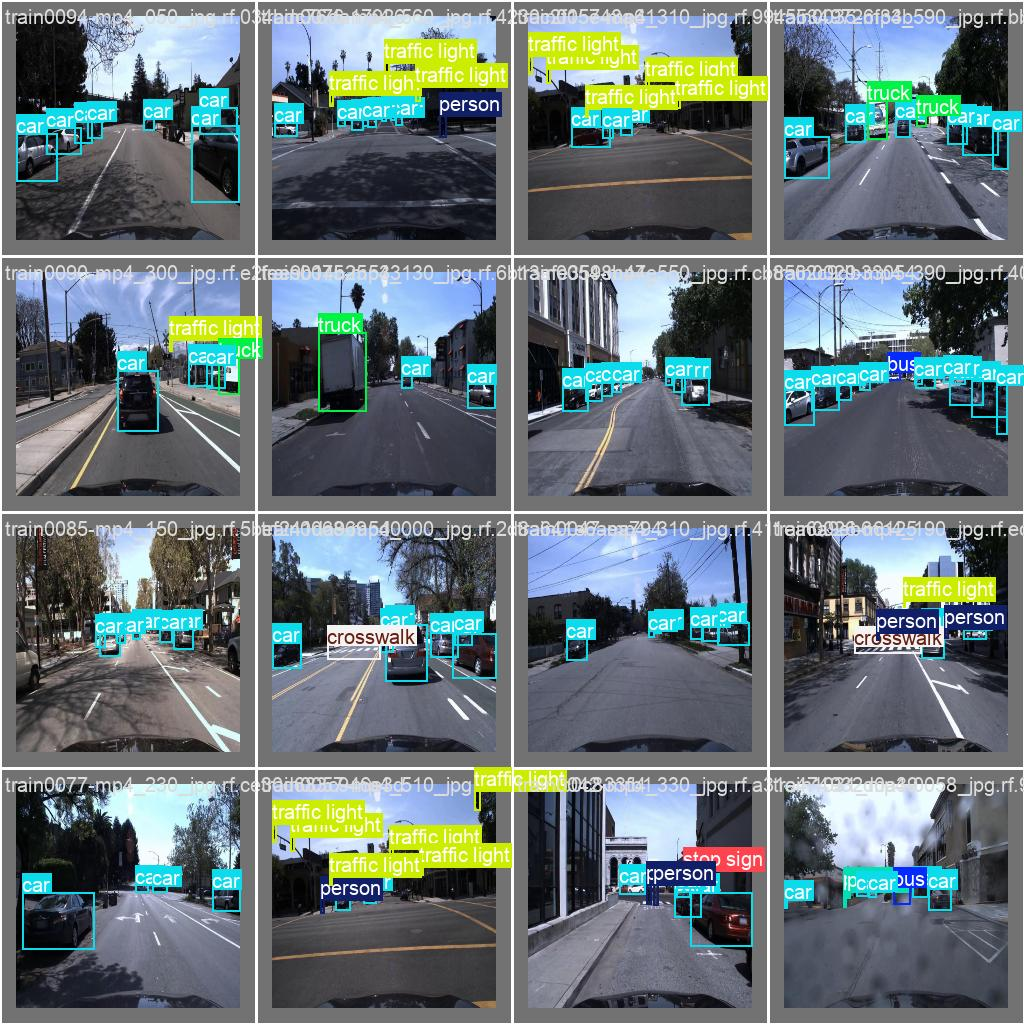

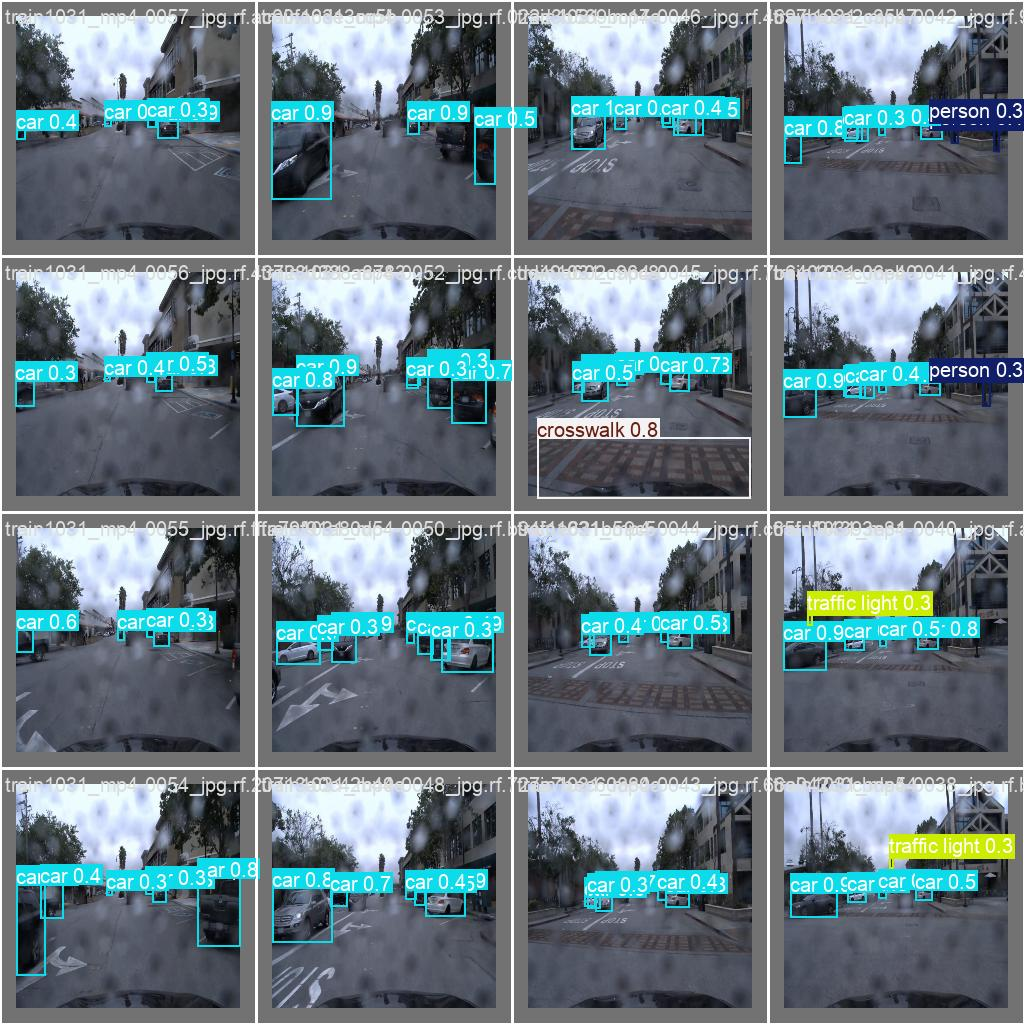

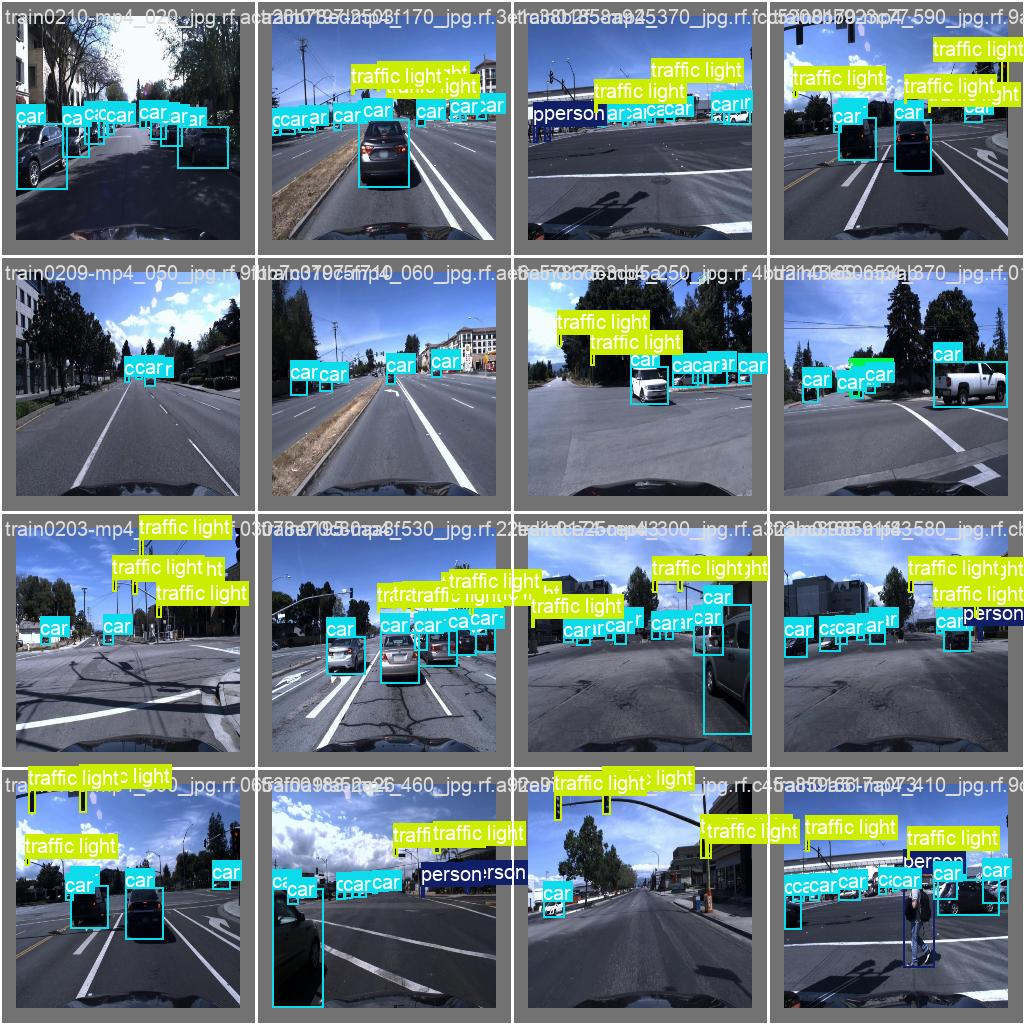

In [21]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/val'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [24]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [25]:
!gdown "https://drive.google.com/uc?id=1mb1-oAjy4ZuveWBTTzl_PukQut-LGqrA&confirm=t"
# https://drive.google.com/file/d/1mb1-oAjy4ZuveWBTTzl_PukQut-LGqrA/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1mb1-oAjy4ZuveWBTTzl_PukQut-LGqrA&confirm=t
To: /content/train0266-mp4_090_jpg.rf.26612b65ce3cc427624eaaba0e229dac.jpg
100% 50.9k/50.9k [00:00<00:00, 93.9MB/s]


In [29]:
!yolo task=detect mode=predict model= "/content/runs/detect/train3/weights/best.pt" conf=0.25 source=image2.jpg save=True

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/image2.jpg: 224x224 3 cars, 47.5ms
Speed: 0.9ms preprocess, 47.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


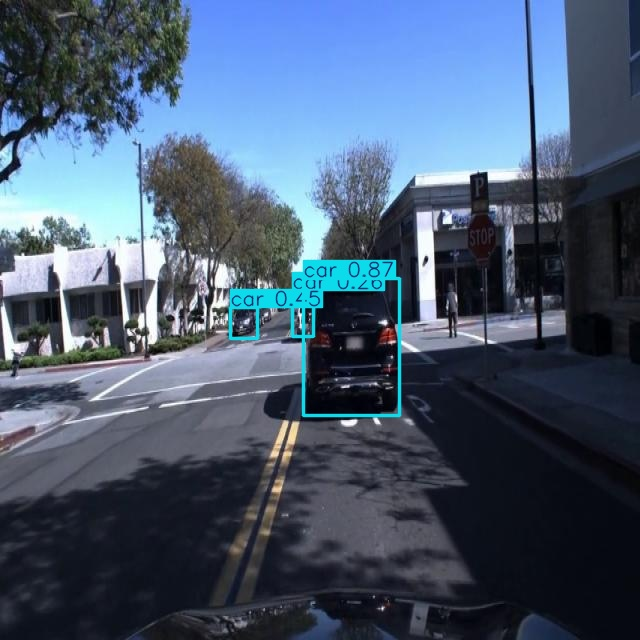

In [30]:
Image("/content/runs/detect/predict2/image2.jpg", width=600)